In [1]:
import pandas as pd
import numpy as np

In [17]:
df_detect = pd.read_csv("실습 파일/05_Detection.csv")
df_process = pd.read_csv("실습 파일/05_Process_A.csv")

In [18]:
df_detect.head(2)

,Unnamed: 0,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416


In [19]:
df_process.head(2)

,Unnamed: 0.1,Unnamed: 0,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6
0,0,0,2018-12-01T00:10:00,P1,AVG,225.637279,228.533316,230.788205,230.634245,232.112927,230.630909
1,1,1,2018-12-01T00:20:00,P1,AVG,225.763044,228.519014,230.428961,230.936762,231.899435,230.564272


In [20]:
df_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  474 non-null    int64  
 1   date_clean  474 non-null    object 
 2   tag         474 non-null    object 
 3   tag_num     474 non-null    object 
 4   unit        474 non-null    object 
 5   Y1A         474 non-null    float64
 6   Y2A         474 non-null    float64
 7   Y3A         474 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 29.8+ KB


In [21]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  10656 non-null  int64  
 1   Unnamed: 0    10656 non-null  int64  
 2   DATE          10656 non-null  object 
 3   PERIOD        10656 non-null  object 
 4   Label         10656 non-null  object 
 5   A1            10656 non-null  float64
 6   A2            10656 non-null  float64
 7   A3            10656 non-null  float64
 8   A4            10656 non-null  float64
 9   A5            10656 non-null  float64
 10  A6            10656 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 915.9+ KB


In [22]:
df_detect['date_clean']=pd.to_datetime(df_detect['date_clean'])
df_process['DATE']=pd.to_datetime(df_process['DATE'])

In [23]:
df_detect.head(2)

,Unnamed: 0,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416


In [24]:
df_process.head(2)

,Unnamed: 0.1,Unnamed: 0,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6
0,0,0,2018-12-01 00:10:00,P1,AVG,225.637279,228.533316,230.788205,230.634245,232.112927,230.630909
1,1,1,2018-12-01 00:20:00,P1,AVG,225.763044,228.519014,230.428961,230.936762,231.899435,230.564272


In [28]:
# df_detect.merge(df_process,left_on="date_clean", right_on="DATE")
df_detect['date_clean']=df_detect['date_clean'].round("1H")

In [30]:
df_detect.merge(df_process,left_on="date_clean", right_on="DATE").head(3)

,Unnamed: 0_x,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,Unnamed: 0.1,Unnamed: 0_y,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6
0,0,2018-12-01 04:00:00,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,23,23,2018-12-01 04:00:00,P1,AVG,224.648534,227.539941,229.864964,229.906252,230.974404,229.545407
1,1,2018-12-01 08:00:00,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,47,47,2018-12-01 08:00:00,P1,AVG,226.571822,229.058791,230.989369,231.486422,232.178278,230.352623
2,2,2018-12-01 12:00:00,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,71,71,2018-12-01 12:00:00,P1,AVG,227.991565,229.527683,231.091045,230.452697,230.349386,228.783197


### 데이터 합병

In [53]:
df1 = pd.read_csv("실습 파일/concat_1.csv")
df2 = pd.read_csv("실습 파일/concat_2.csv")
df3 = pd.read_csv("실습 파일/concat_3.csv")

df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [54]:
# 기본적 같은 열이름끼리 합쳐줌
result = pd.concat([df1,df2,df3]) 
result

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [55]:
# 기본적 같은 열이름끼리 합쳐줌 & 열 이름을 다시 생성
result = pd.concat([df1,df2,df3], ignore_index=True) 
result

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [56]:
#같은 행이름끼리 합치기
result = pd.concat([df1,df2,df3], axis=1) 
result

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [57]:
df2.columns=['A','C','E','F']
df2

,A,C,E,F
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [58]:
pd.concat([df1,df2,df3])

,A,B,C,D,E,F
0,a0,b0,c0,d0,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN
0,a4,NaN,b4,NaN,c4,d4
1,a5,NaN,b5,NaN,c5,d5
2,a6,NaN,b6,NaN,c6,d6
3,a7,NaN,b7,NaN,c7,d7
0,a8,b8,c8,d8,NaN,NaN
1,a9,b9,c9,d9,NaN,NaN


In [59]:
df2.index = [0,2,3,4]
df2

,A,C,E,F
0,a4,b4,c4,d4
2,a5,b5,c5,d5
3,a6,b6,c6,d6
4,a7,b7,c7,d7


In [60]:
#같은 행이름끼리 합치기
result = pd.concat([df1,df2,df3], axis=1) 
result

,A,B,C,D,A,C,E,F,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,a9,b9,c9,d9
2,a2,b2,c2,d2,a5,b5,c5,d5,a10,b10,c10,d10
3,a3,b3,c3,d3,a6,b6,c6,d6,a11,b11,c11,d11
4,NaN,NaN,NaN,NaN,a7,b7,c7,d7,NaN,NaN,NaN,NaN


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [65]:
# 히트맵
a = flights.pivot_table(index="year",columns='month',values='passengers')
a

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<Axes: xlabel='month', ylabel='year'>

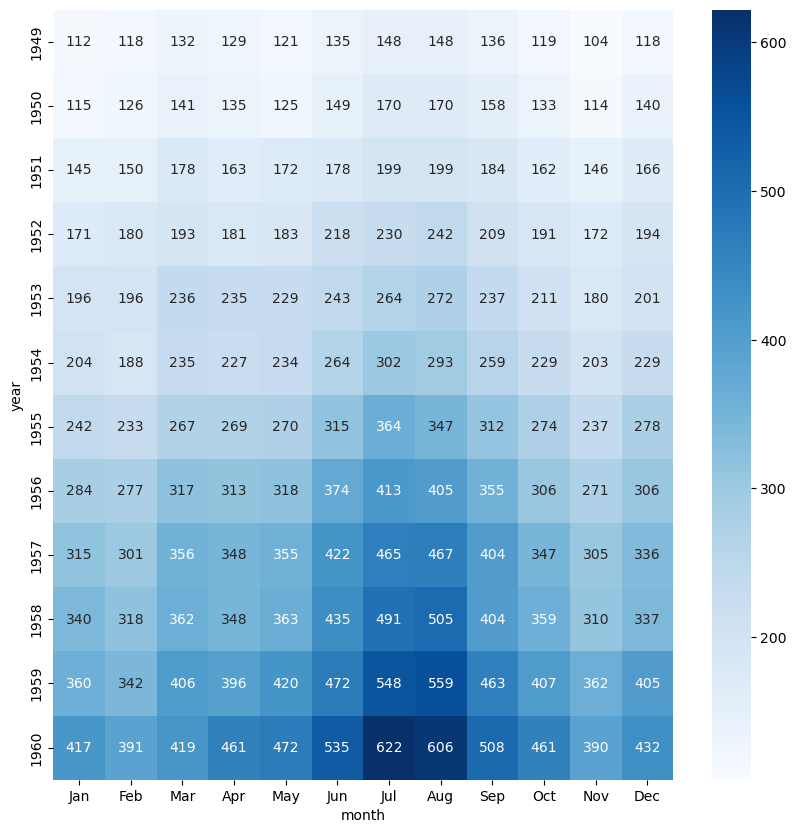

In [78]:
# annot 은 숫자 넣기
# 
plt.figure(figsize = (10,10))
sns.heatmap(a, cmap="Blues",annot=True, fmt=".0f")

In [4]:
df=pd.read_csv("실습 파일/gapminder.tsv", sep="\t")
grouped = df.groupby("year")

In [6]:
grouped.groups.keys()

dict_keys([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007])

In [10]:
idx = grouped.groups[1957]

In [11]:
df.iloc[idx]

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
13,Albania,Europe,1957,59.280,1476505,1942.284244
25,Algeria,Africa,1957,45.685,10270856,3013.976023
37,Angola,Africa,1957,31.999,4561361,3827.940465
49,Argentina,Americas,1957,64.399,19610538,6856.856212
...,...,...,...,...,...,...
1645,Vietnam,Asia,1957,42.887,28998543,676.285448
1657,West Bank and Gaza,Asia,1957,45.671,1070439,1827.067742
1669,"Yemen, Rep.",Asia,1957,33.970,5498090,804.830455
1681,Zambia,Africa,1957,44.077,3016000,1311.956766


<Axes: xlabel='year'>

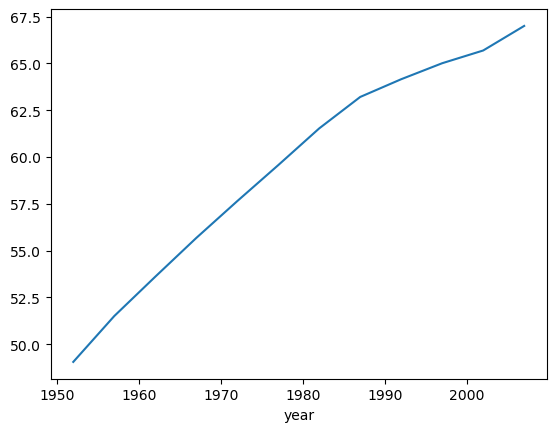

In [14]:
a = df.groupby('year')['lifeExp'].mean()
a.plot()

In [ ]:
df.groupby('year')['lifeExp'].transform(lambda x:x-x.mean())

In [17]:
df.groupby(['year','continent'])['lifeExp'].mean()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [26]:
# 대륙별로 국각가 몇개있는지?
#count : 중복 허용
#nunique : 중복 불가
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [23]:
df.country.unique

<bound method Series.unique of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object>

In [27]:
df.groupby('year')[['lifeExp','pop','gdpPercap']].mean()

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,1.695040e+07,3725.276046
1957,51.507401,1.876341e+07,4299.408345
1962,53.609249,2.042101e+07,4725.812342
1967,55.678290,2.265830e+07,5483.653047
1972,57.647386,2.518998e+07,6770.082815
1977,59.570157,2.767638e+07,7313.166421
1982,61.533197,3.020730e+07,7518.901673
1987,63.212613,3.303857e+07,7900.920218
1992,64.160338,3.599092e+07,8158.608521


In [31]:
# 기대수명(평균), 인구수(최대값), 1인당 gdp(중앙값)
df.groupby('year').agg({'lifeExp':['mean'],'pop':['max','min'],'gdpPercap':['median']})

lifeExp         pop            gdpPercap
           mean         max     min       median
year                                            
1952  49.057620   556263527   60011  1968.528344
1957  51.507401   637408000   61325  2173.220291
1962  53.609249   665770000   65345  2335.439533
1967  55.678290   754550000   70787  2678.334740
1972  57.647386   862030000   76595  3339.129407
1977  59.570157   943455000   86796  3798.609244
1982  61.533197  1000281000   98593  4216.228428
1987  63.212613  1084035000  110812  4280.300366
1992  64.160338  1164970000  125911  4386.085502
1997  65.014676  1230075000  145608  4781.825478
2002  65.694923  1280400000  170372  5319.804524
2007  67.007423  1318683096  199579  6124.371108

In [38]:
#연도별로 1인당 GDP 가장 높았던 나라
idx=df.groupby('year')['gdpPercap'].idxmax()

In [39]:
df.loc[idx][['year','country','gdpPercap']]

,year,country,gdpPercap
852,1952,Kuwait,108382.35290
853,1957,Kuwait,113523.13290
854,1962,Kuwait,95458.11176
855,1967,Kuwait,80894.88326
856,1972,Kuwait,109347.86700
857,1977,Kuwait,59265.47714
1314,1982,Saudi Arabia,33693.17525
1147,1987,Norway,31540.97480
860,1992,Kuwait,34932.91959
1149,1997,Norway,41283.16433


In [40]:
#연도별로 인구수의 최대값-최소값
df.groupby('year')['pop'].apply(lambda x : x.max()-x.min())

year
1952     556203516
1957     637346675
1962     665704655
1967     754479213
1972     861953405
1977     943368204
1982    1000182407
1987    1083924188
1992    1164844089
1997    1229929392
2002    1280229628
2007    1318483517
Name: pop, dtype: int64

In [47]:
# 연도별로 기대수명의 평균이 60이상인 나라들만 필터링
df.groupby('year').filter(lambda x:x['lifeExp'].mean()>=60)

,country,continent,year,lifeExp,pop,gdpPercap
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
